## Predict Car Resale Price

### From the datatset provided predict the resale car price of different model and different car models.

In [1]:
# imports

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['axes.labelsize']= 15.
plt.rcParams['xtick.labelsize']= 15.
plt.rcParams['ytick.labelsize']= 15.
plt.rcParams['figure.figsize']= [15.,8.]
plt.rcParams['legend.fontsize'] = 13.

In [3]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
len(df)

301

In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Unique values
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


### NO missing value found

In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# Create a column of current year to calculate the number of year car has been used.
final_dataset['current_year'] = pd.datetime.now().year

In [13]:
#Calulate number of year used
final_dataset['year_used']=final_dataset['current_year']-final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,year_used
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [15]:
# Deleting Column Year and current year 
final_dataset.drop(['Year'], axis=1, inplace=True)

In [16]:
final_dataset.drop(['current_year'], axis=1, inplace=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_used
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [18]:
# Dealing with Categorical Features
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [19]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [20]:
final_dataset.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,7.372093,0.199336,0.794020,0.352159,0.867110
std,5.082812,8.644115,38886.883882,0.247915,2.891554,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,9.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,92.600000,500000.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000


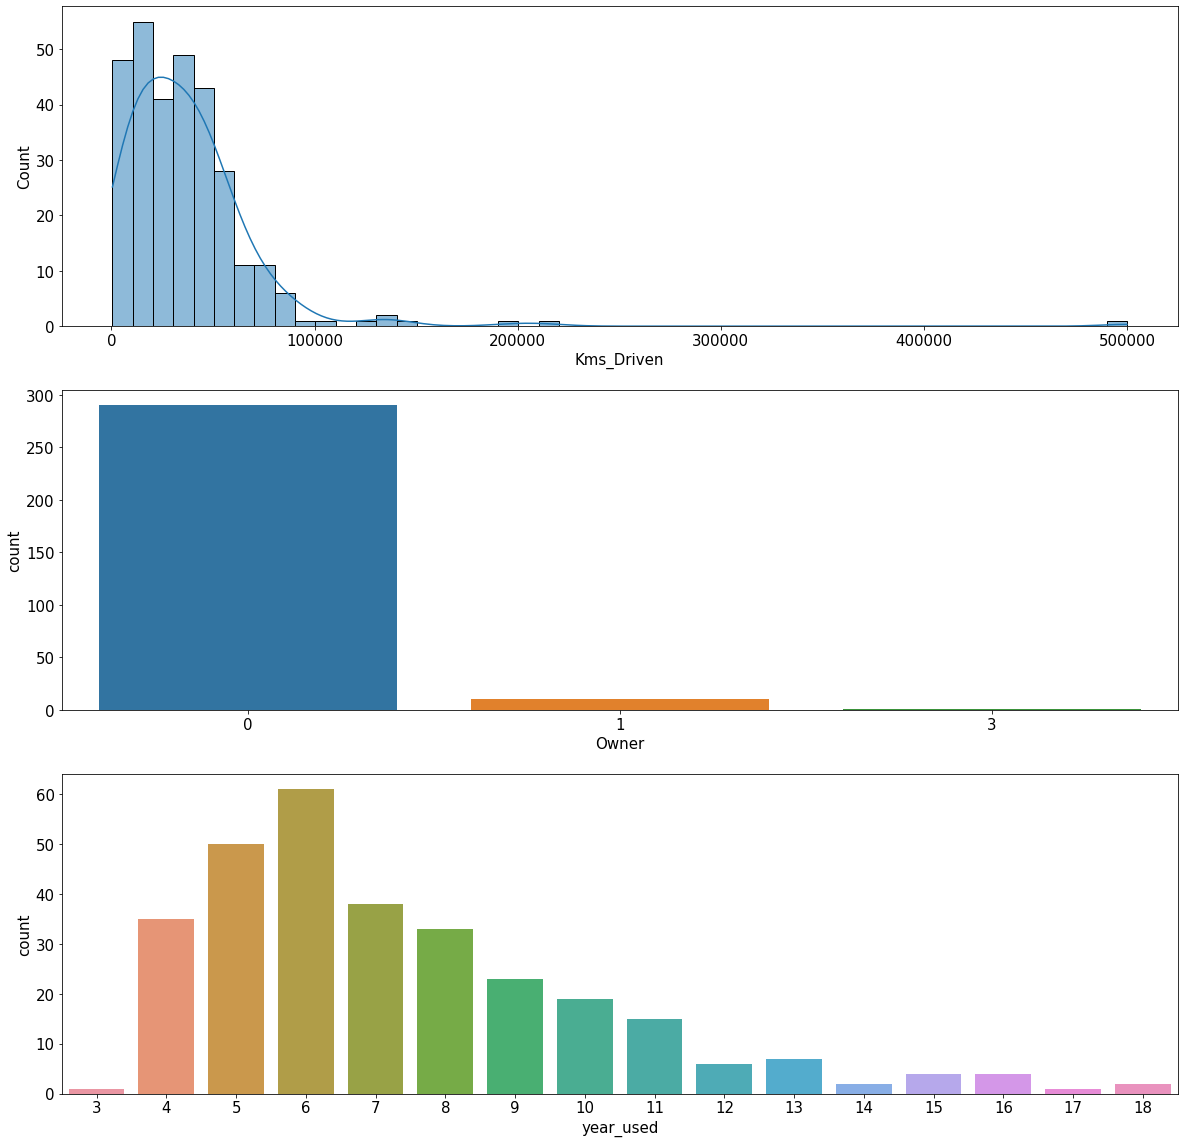

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.histplot(data=final_dataset, x='Kms_Driven', kde=True);
plt.subplot(3,1,2)
sns.countplot(data=final_dataset, x='Owner');
plt.subplot(3,1,3)
sns.countplot(data=final_dataset, x='year_used');

### Maximum number of cars are 6 years used
### Maximum cars are from The Dealer directly
### Almost ebery car is driven between 0-10000 KMs

In [22]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
year_used,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


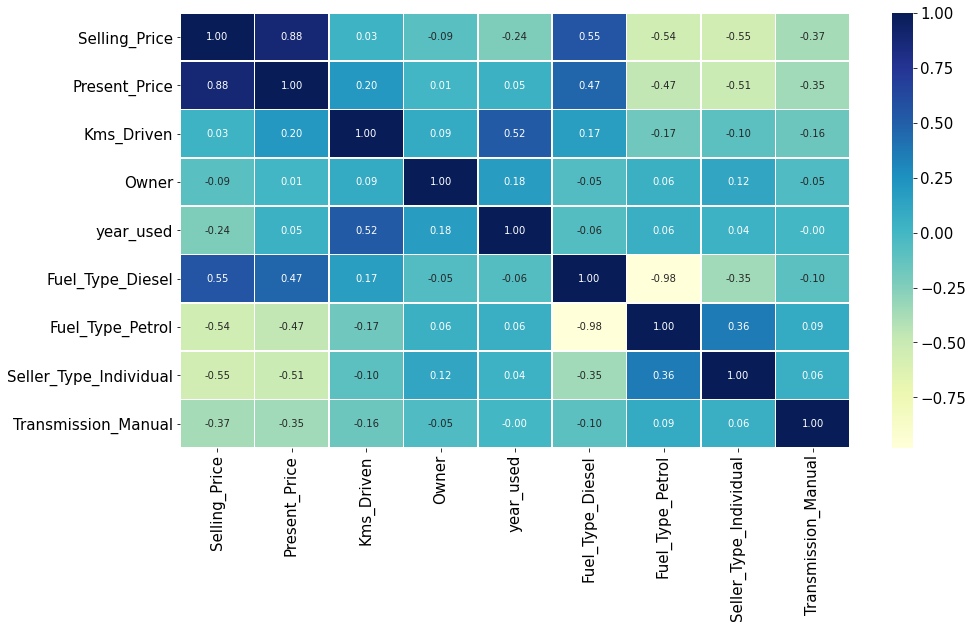

In [23]:
corr_mat=final_dataset.corr()
sns.heatmap(corr_mat,
            annot=True,
            linewidths= 0.5,
            cmap="YlGnBu",
            fmt=".2f");

### Present Price is highly corelated to selling price

In [24]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [25]:
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [26]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [27]:
x.head()

,Present_Price,Kms_Driven,Owner,year_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [28]:
# Train and test set 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [29]:
x_train.shape, y_train.shape

((210, 8), (210,))

### RandomForestRegressor

In [30]:
ref = RandomForestRegressor()
ref.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
ref.score(x_test,y_test)

0.9210934367421841

### Linear Regression

In [32]:
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [33]:
lin.score(x_test,y_test)

0.7985376041129635

###  Hyperparameter Tuning RandomForestRegressor

In [34]:
# Using RandomizedSearchCV For Hyperparameter Tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [35]:
ref_grid = {'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf}

In [36]:
ref_model = RandomizedSearchCV(estimator=ref,
                              param_distributions=ref_grid,
                              verbose=2,
                              scoring="neg_mean_squared_error",
                              random_state= 42,
                              n_jobs=1,
                              cv=5,
                              n_iter=10)

In [37]:
ref_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
ref_model.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [39]:
ref_model.best_score_

-4.406733854865155

In [40]:
y_preds= ref_model.predict(x_test)

In [41]:
y_preds

array([ 0.22567469,  4.73668531,  7.75599007,  5.36981861,  8.60876509,
        8.48290678,  2.76613395,  7.39090432,  0.56016299,  2.94420453,
        1.24040314,  4.58202384,  0.38955389, 10.20122831,  0.3884259 ,
        0.5561429 ,  7.40922903,  0.57063732, 10.53733821,  2.7723009 ,
       10.6264252 ,  0.39481178, 10.22270375,  3.64010151,  0.30012582,
        2.79551142,  0.59327255,  0.67574439,  1.23890335, 21.15542347,
        4.62277778,  5.41907614,  1.241917  ,  3.33033462,  7.10010776,
        7.57386819,  0.23159464,  2.77098002,  3.04687932, 11.45801038,
        4.3332968 ,  4.82504681,  5.79722091,  4.76907027,  5.40012394,
        0.55752194,  1.25062157,  2.79794176,  6.97109164,  0.4193932 ,
        3.32433995,  1.241917  ,  7.58653156,  0.22616644,  0.55992002,
        0.56866055,  2.39883737,  0.60671533,  0.59407588,  6.87676169,
        4.56347745,  1.27583704,  0.28805047,  5.39932347,  5.06229911,
       21.01804723,  0.94970704,  1.241917  , 10.96832345,  5.41

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

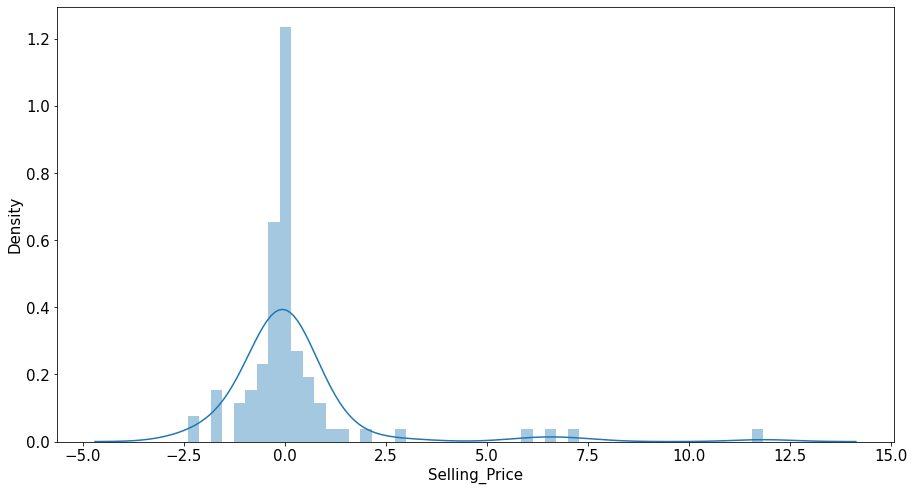

In [42]:
sns.distplot(y_test-y_preds)

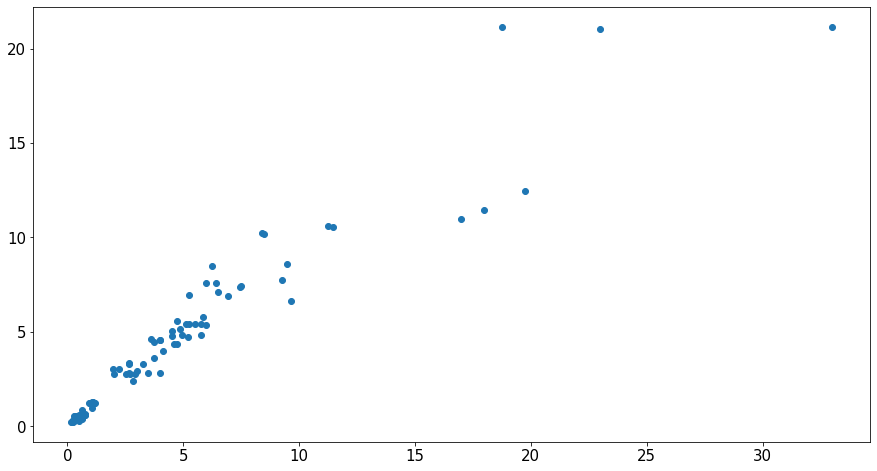

In [43]:
plt.scatter(y_test, y_preds);

## The result of plot is linear which means our prediction is good

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_preds))
print('MSE:', metrics.mean_squared_error(y_test, y_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

MAE: 0.8165113192515555
MSE: 3.5786518017738502
RMSE: 1.8917324868421144


In [45]:
# Import Pickle
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(ref_model, file)